In [13]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Create the environment
env_id = "Pendulum-v1"
env = make_vec_env(env_id, n_envs=1)

for timesteps in list(range(10000, 15000, 100)):

    # Instantiate the agent
    model = PPO(
        "MlpPolicy",
        env,
        gamma=0.98,
        # Using https://proceedings.mlr.press/v164/raffin22a.html
        use_sde=True,
        sde_sample_freq=4,
        learning_rate=1e-3,
        verbose=1,
    )

    # Train the agent
    model.learn(total_timesteps=timesteps)

    # Save the agent in folder "PPO_models"
    model.save(f"PPO_models/PPO_{timesteps}")
    print(f"Model saved as PPO_{timesteps}")



Using cpu device
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.24e+03 |
| time/              |           |
|    fps             | 2789      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.28e+03   |
| time/                   |             |
|    fps                  | 1619        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004157668 |
|    clip_fraction        | 0.0181      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.68       |
|    explained_variance   | -0.00362    |
|  

Average cumulated reward for 100 timesteps: [-3125.2642]
Average cumulated reward for 200 timesteps: [-3005.0667]
Average cumulated reward for 300 timesteps: [-2947.2607]
Average cumulated reward for 400 timesteps: [-3740.1477]
Average cumulated reward for 500 timesteps: [-3375.8826]
Average cumulated reward for 600 timesteps: [-2929.8284]
Average cumulated reward for 700 timesteps: [-3118.4685]
Average cumulated reward for 800 timesteps: [-3071.4539]
Average cumulated reward for 900 timesteps: [-3701.0247]
Average cumulated reward for 1000 timesteps: [-3790.1208]
Average cumulated reward for 1100 timesteps: [-3230.4077]
Average cumulated reward for 1200 timesteps: [-2916.9072]
Average cumulated reward for 1300 timesteps: [-2933.7312]
Average cumulated reward for 1400 timesteps: [-3017.7498]
Average cumulated reward for 1500 timesteps: [-3076.2961]
Average cumulated reward for 1600 timesteps: [-3695.589]
Average cumulated reward for 1700 timesteps: [-3707.3538]
Average cumulated reward

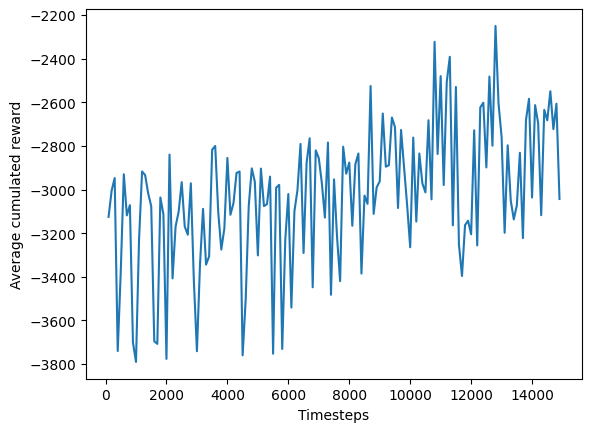

In [16]:
result = []

for timesteps in list(range(100, 15000, 100)):
    # Load the trained agent
    model = PPO.load(f"PPO_models/PPO_{timesteps}")

    # Enjoy trained agent
    obs = env.reset()
    cumulated_reward = 0
    for i in range(100):
        all_rewards = 0
        for j in range(500):
            action, _states = model.predict(obs, deterministic=True)
            obs, rewards, dones, info = env.step(action)
            # env.render()
            all_rewards += rewards
        # reset the environment
        obs = env.reset()
        cumulated_reward += all_rewards
    result.append([timesteps, cumulated_reward/100])
    print(f"Average cumulated reward for {timesteps} timesteps: {cumulated_reward/100}")

# Plot the results
import matplotlib.pyplot as plt

plt.plot([x[0] for x in result], [x[1] for x in result])
plt.xlabel("Timesteps")
plt.ylabel("Average cumulated reward")
plt.show()

In [9]:
env.close()